In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Rebalancing

Let $\mathbf{w}_t \in \mathbb{R}^d$ and $\mathbf{r}_t \in \mathbb{R}^d$ be the weight and return vector of assets at time $t$. and $W_t$ be the wealth at time $t$. So
$$
W_{t+1} = \sum_{i=1}^d W_{t} w_{i,t} (1+ r_{i,t})
$$
Net return at time $t+1$ is 
$$
R_{t+1} = \sum_{i=1}^d w_{i,t} r_{i,t} = \mathbf{w}_t \cdot \mathbf{r}_t
$$
Mean and variance of $R_{t+1}$ is
$$
\mathbb{E}[ R_{t+1}] = \mathbf{w}_{t+1} \cdot \mathbf{\mu}_{t+1} \qquad Var[ R_{t+1}]  = \mathbf{w}_{t+1}^T \Sigma  \mathbf{w}_{t+1}
$$

### constant rebalancing
Consider the special case that $\mathbf{w}_t = \mathbf{w} \in \mathbb{R}^d$ is a constant. For example, $d=3$ (two risky and one fixed).

In [15]:
def generate_path(p,ratio,T):
    path =np.zeros(T)
    for t in range(T):
        alpha = np.random.rand()
        if alpha < p :
            r = ratio
        else :
            r= -ratio
        path[t] = r
    return path
def R_mean_std(weight_vec,p_vec,ratio_vec,T):
    d = len(weight_vec)
    R = np.zeros(T)
    for i in range(d):
        path = generate_path(p_vec[i], ratio_vec[i],T )
        R+= weight_vec[i]*path
    return np.mean(R), np.std(R)
        

In [ ]:
for i,w in enumerate(test):
    if i%10 ==0:
        print(i)
    mean_array[i] ,std_array[i] = R_mean_std((w,1-w),p,r,T) 

0
10
20
30
40
50
60
70
80
90


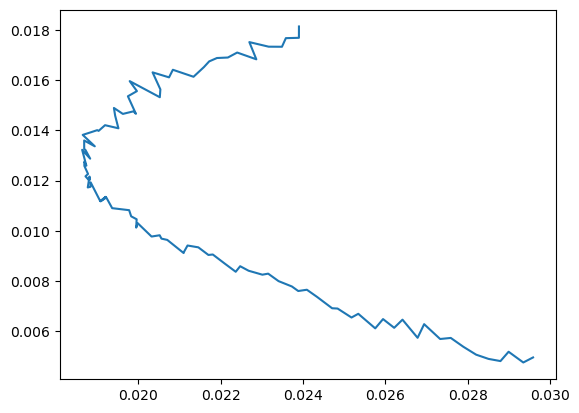

In [31]:
p = (0.8,0.58)
r = (0.03 , 0.03)
T = 10000
mean_array = np.zeros(100)
std_array = np.zeros(100)

for i,w in enumerate(np.linspace(0,1,100)):
    if i%10 ==0:
        print(i)
    mean_array[i] ,std_array[i] = R_mean_std((w,1-w),p,r,T) 
plt.plot(std_array,mean_array)